In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/icc-mens-odi-world-cup-2023/ICC MENS ODI WORLD CUP 2023/Bowling records/most_wickets.csv
/kaggle/input/icc-mens-odi-world-cup-2023/ICC MENS ODI WORLD CUP 2023/Bowling records/best_strike_rates_in_an_innings.csv
/kaggle/input/icc-mens-odi-world-cup-2023/ICC MENS ODI WORLD CUP 2023/Bowling records/best_strike_rates.csv
/kaggle/input/icc-mens-odi-world-cup-2023/ICC MENS ODI WORLD CUP 2023/Bowling records/most_four_wickets_in_an_innings.csv
/kaggle/input/icc-mens-odi-world-cup-2023/ICC MENS ODI WORLD CUP 2023/Bowling records/most_wickest.csv
/kaggle/input/icc-mens-odi-world-cup-2023/ICC MENS ODI WORLD CUP 2023/Bowling records/most_five_wickets_in_an_innings .csv
/kaggle/input/icc-mens-odi-world-cup-2023/ICC MENS ODI WORLD CUP 2023/Bowling records/best_bowling_figures_in_an_innigs.csv
/kaggle/input/icc-mens-odi-world-cup-2023/ICC MENS ODI WORLD CUP 2023/Bowling records/best_economy_rates_in_an_innings.csv
/kaggle/input/icc-mens-odi-world-cup-2023/ICC MENS ODI WORLD CUP 2023/Bo

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df_bowler = pd.read_csv("/kaggle/input/icc-mens-odi-world-cup-2023/ICC MENS ODI WORLD CUP 2023/Bowling records/most_wickets.csv")
df_batsmen = pd.read_csv("/kaggle/input/icc-mens-odi-world-cup-2023/ICC MENS ODI WORLD CUP 2023/Batting records/highest_average.csv")
df_catches = pd.read_csv("/kaggle/input/icc-mens-odi-world-cup-2023/ICC MENS ODI WORLD CUP 2023/Fielding records/most_catches.csv")
df_matchresult = pd.read_csv("/kaggle/input/icc-mens-odi-world-cup-2023/ICC MENS ODI WORLD CUP 2023/Team Records/match_results.csv")
df_highestscore = pd.read_csv("/kaggle/input/icc-mens-odi-world-cup-2023/ICC MENS ODI WORLD CUP 2023/Batting records/high_scores.csv")

In [12]:
df_bowler

,Player,Span,Mat,Inns,Balls,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5
0,Mohammed Shami (IND),2023-2023,7,7,293,48.5,4,257,24,7/57,10.70,5.26,12.20,1,3
1,A Zampa (AUS),2023-2023,11,11,576,96.0,1,515,23,4/8,22.39,5.36,25.04,3,-
2,D Madushanka (SL),2023-2023,9,9,470,78.2,4,525,21,5/80,25.00,6.70,22.38,1,1
3,JJ Bumrah (IND),2023-2023,11,11,551,91.5,9,373,20,4/39,18.65,4.06,27.55,1,-
4,G Coetzee (SA),2023-2023,8,8,381,63.3,1,396,20,4/44,19.80,6.23,19.05,1,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,R Ashwin (IND),2023-2023,1,1,60,10.0,1,34,1,1/34,34.00,3.40,60.00,-,-
80,AL Phehlukwayo (SA),2023-2023,1,1,42,7.0,-,36,1,1/36,36.00,5.14,42.00,-,-
81,Saqib Zulfiqar (NED),2023-2023,2,2,30,5.0,-,40,1,1/25,40.00,8.00,30.00,-,-
82,JE Root (ENG),2023-2023,9,2,61,10.1,-,67,1,1/19,67.00,6.59,61.00,-,-


In [13]:

df_batsmen 

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,V Kohli (IND),2023-2023,11,11,3,765,117,95.62,847,90.31,3,6,1,68,9
1,KS Williamson (NZ),2023-2023,4,4,1,256,95,85.33,274,93.43,-,3,-,28,4
2,KL Rahul (IND),2023-2023,11,10,4,452,102,75.33,498,90.76,1,2,-,38,9
3,Fakhar Zaman (PAK),2023-2023,4,4,1,220,126*,73.33,179,122.90,1,1,-,14,18
4,Azmatullah Omarzai (AFG),2023-2023,9,8,3,353,97*,70.60,361,97.78,-,3,-,26,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,MM Ali (ENG),2023-2023,6,6,0,95,42,15.83,127,74.80,-,-,-,8,1
96,BFW de Leede (NED),2023-2023,9,9,0,139,67,15.44,199,69.84,-,1,-,15,2
97,AU Rashid (ENG),2023-2023,9,9,3,92,20,15.33,91,101.09,-,-,-,7,2
98,JC Buttler (ENG),2023-2023,9,9,0,138,43,15.33,142,97.18,-,-,-,11,5


In [14]:

df_catches

,Player,Span,Mat,Inns,Ct,Max,Ct/Inn
0,DJ Mitchell (NZ),2023-2023,10,10,11,3,1.100
1,M Labuschagne (AUS),2023-2023,11,11,8,2,0.727
2,DA Warner (AUS),2023-2023,11,11,8,2,0.727
3,DA Miller (SA),2023-2023,10,10,7,2,0.700
4,RA Jadeja (IND),2023-2023,11,11,7,3,0.636
...,...,...,...,...,...,...,...
95,Mohammad Nawaz (PAK),2023-2023,5,5,1,1,0.200
96,Fazalhaq Farooqi (AFG),2023-2023,6,6,1,1,0.166
97,Imam-ul-Haq (PAK),2023-2023,6,6,1,1,0.166
98,CAK Rajitha (SL),2023-2023,6,6,1,1,0.166


In [15]:
df_matchresult

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard
0,India,Australia,Australia,6 wickets,Ahmedabad,"Nov 19, 2023",ODI # 4705
1,Australia,South Africa,Australia,3 wickets,Eden Gardens,"Nov 16, 2023",ODI # 4704
2,India,New Zealand,India,70 runs,Wankhede,"Nov 15, 2023",ODI # 4703
3,India,Netherlands,India,160 runs,Bengaluru,"Nov 12, 2023",ODI # 4702
4,England,Pakistan,England,93 runs,Eden Gardens,"Nov 11, 2023",ODI # 4701
5,Australia,Bangladesh,Australia,8 wickets,Pune,"Nov 11, 2023",ODI # 4700
6,Afghanistan,South Africa,South Africa,5 wickets,Ahmedabad,"Nov 10, 2023",ODI # 4699
7,New Zealand,Sri Lanka,New Zealand,5 wickets,Bengaluru,"Nov 9, 2023",ODI # 4698
8,England,Netherlands,England,160 runs,Pune,"Nov 8, 2023",ODI # 4697
9,Afghanistan,Australia,Australia,3 wickets,Wankhede,"Nov 7, 2023",ODI # 4696


In [16]:
df_highestscore 

,Player,Runs,Mins,Balls,4s,6s,SR,Team,Opposition,Ground,Match Date,Scorecard
0,GJ Maxwell,201*,181,128,21,10,157.03,Australia,v Afghanistan,Wankhede,07 Nov 2023,ODI # 4696
1,MR Marsh,177*,177,132,17,9,134.09,Australia,v Bangladesh,Pune,11 Nov 2023,ODI # 4700
2,Q de Kock,174,192,140,15,7,124.28,South Africa,v Bangladesh,Wankhede,24 Oct 2023,ODI # 4680
3,DA Warner,163,180,124,14,9,131.45,Australia,v Pakistan,Bengaluru,20 Oct 2023,ODI # 4675
4,DP Conway,152*,147,121,19,3,125.61,New Zealand,v England,Ahmedabad,05 Oct 2023,ODI # 4658
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Abdullah Shafique,68,94,69,9,2,98.55,Pakistan,v Bangladesh,Eden Gardens,31 Oct 2023,ODI # 4688
96,BFW de Leede,67,92,68,6,2,98.52,Netherlands,v Pakistan,Hyderabad,06 Oct 2023,ODI # 4659
97,Babar Azam,66*,93,63,6,2,104.76,Pakistan,v New Zealand,Bengaluru,04 Nov 2023,ODI # 4692
98,Mushfiqur Rahim,66,93,75,6,2,88.00,Bangladesh,v New Zealand,Chennai,13 Oct 2023,ODI # 4668


In [17]:
df_batsmen.describe()

,Mat,Inns,NO,Runs,Ave,BF,SR,4s,6s
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,8.020000,7.170000,1.080000,223.180000,35.211600,237.180000,94.812000,21.530000,6.170000
std,2.369759,2.542785,1.203362,157.563287,17.414662,159.425761,19.546176,15.627259,6.627239
min,2.000000,1.000000,0.000000,19.000000,15.330000,23.000000,45.200000,1.000000,0.000000
25%,7.000000,6.000000,0.000000,96.500000,21.000000,104.000000,80.775000,7.000000,2.000000
50%,9.000000,8.000000,1.000000,166.500000,30.885000,199.500000,94.010000,20.500000,4.000000
75%,10.000000,9.000000,2.000000,328.250000,44.595000,358.500000,107.155000,30.250000,9.000000
max,11.000000,11.000000,5.000000,765.000000,95.620000,847.000000,160.860000,68.000000,31.000000


In [18]:
df_bowler.describe()

,Mat,Inns,Balls,Overs,Runs,Wkts,Ave,Econ,SR
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,6.916667,6.404762,293.154762,48.748810,278.678571,8.214286,42.209524,6.015714,42.704762
std,3.042701,3.058148,167.370269,27.869699,147.298497,5.929448,22.352719,1.270103,21.787009
min,1.000000,1.000000,5.000000,0.500000,7.000000,1.000000,7.000000,3.400000,5.000000
25%,4.000000,4.000000,141.250000,23.525000,155.000000,3.000000,27.882500,5.260000,28.210000
50%,8.000000,7.000000,300.000000,50.000000,266.000000,6.500000,36.000000,5.840000,36.150000
75%,9.000000,9.000000,429.000000,71.400000,398.000000,12.000000,50.625000,6.595000,52.125000
max,11.000000,11.000000,576.000000,96.000000,533.000000,24.000000,118.500000,10.820000,114.000000


In [19]:
df_matchresult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Team 1      48 non-null     object
 1   Team 2      48 non-null     object
 2   Winner      48 non-null     object
 3   Margin      48 non-null     object
 4   Ground      48 non-null     object
 5   Match Date  48 non-null     object
 6   Scorecard   48 non-null     object
dtypes: object(7)
memory usage: 2.8+ KB


# Now let us visualize the overall anlaysis of the datasets of ICC Men's WorldCup 2023

**Let's find the top 10 batsmen with the highest run in the worldcup**

In [20]:
hero = df_batsmen.sort_values('Runs',ascending=False).head(10)
hero

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,V Kohli (IND),2023-2023,11,11,3,765,117,95.62,847,90.31,3,6,1,68,9
13,RG Sharma (IND),2023-2023,11,11,0,597,131,54.27,474,125.94,1,3,1,66,31
10,Q de Kock (SA),2023-2023,10,10,0,594,174,59.40,555,107.02,4,-,-,57,21
9,R Ravindra (NZ),2023-2023,10,10,1,578,123*,64.22,543,106.44,3,2,-,55,17
5,DJ Mitchell (NZ),2023-2023,10,9,1,552,134,69.00,497,111.06,2,2,-,48,22
20,DA Warner (AUS),2023-2023,11,11,0,535,163,48.63,494,108.29,2,2,-,50,24
7,SS Iyer (IND),2023-2023,11,11,3,530,128*,66.25,468,113.24,2,3,1,37,24
2,KL Rahul (IND),2023-2023,11,10,4,452,102,75.33,498,90.76,1,2,-,38,9
18,HE van der Dussen (SA),2023-2023,10,10,1,448,133,49.77,530,84.52,2,2,-,39,8
19,MR Marsh (AUS),2023-2023,10,10,1,441,177*,49.00,410,107.56,2,1,2,43,21


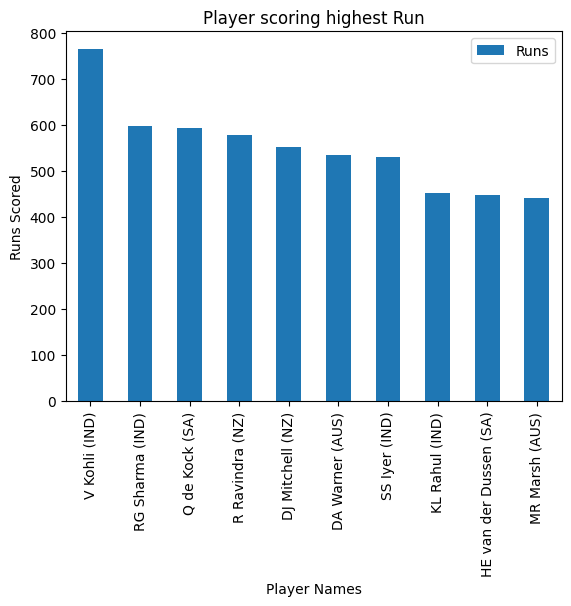

In [21]:
hero.plot(kind = 'bar',x='Player',y='Runs')
plt.title('Player scoring highest Run')
plt.xlabel('Player Names')
plt.ylabel('Runs Scored')
plt.show()

**Top 5 batsmen with highest average**

In [22]:
hero1 = df_batsmen.sort_values('Ave',ascending=False).head(5)
hero1

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,V Kohli (IND),2023-2023,11,11,3,765,117,95.62,847,90.31,3,6,1,68,9
1,KS Williamson (NZ),2023-2023,4,4,1,256,95,85.33,274,93.43,-,3,-,28,4
2,KL Rahul (IND),2023-2023,11,10,4,452,102,75.33,498,90.76,1,2,-,38,9
3,Fakhar Zaman (PAK),2023-2023,4,4,1,220,126*,73.33,179,122.90,1,1,-,14,18
4,Azmatullah Omarzai (AFG),2023-2023,9,8,3,353,97*,70.60,361,97.78,-,3,-,26,13


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x800 with 0 Axes>

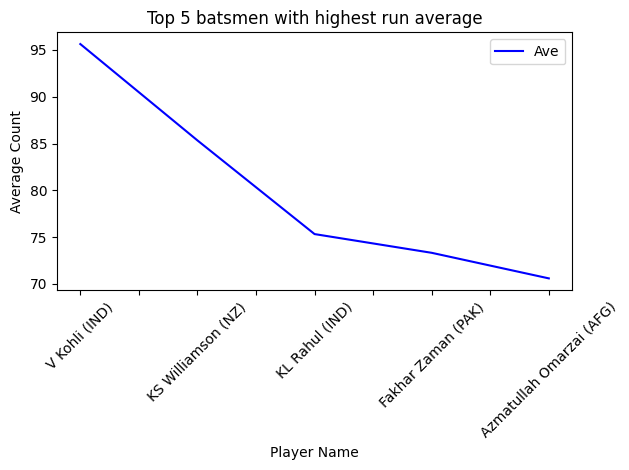

In [23]:
plt.figure(figsize=(10,8))
hero1.plot(kind='line',x = 'Player',y='Ave',color = 'blue' )
plt.title('Top 5 batsmen with highest run average')
plt.xlabel('Player Name')
plt.ylabel('Average Count')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show

**10 Highest wicket taker in the worldcup**

In [24]:
bowl = df_bowler.sort_values('Wkts',ascending=False).head(10)
bowl

,Player,Span,Mat,Inns,Balls,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5
0,Mohammed Shami (IND),2023-2023,7,7,293,48.5,4,257,24,7/57,10.70,5.26,12.20,1,3
1,A Zampa (AUS),2023-2023,11,11,576,96.0,1,515,23,4/8,22.39,5.36,25.04,3,-
2,D Madushanka (SL),2023-2023,9,9,470,78.2,4,525,21,5/80,25.00,6.70,22.38,1,1
4,G Coetzee (SA),2023-2023,8,8,381,63.3,1,396,20,4/44,19.80,6.23,19.05,1,-
3,JJ Bumrah (IND),2023-2023,11,11,551,91.5,9,373,20,4/39,18.65,4.06,27.55,1,-
5,Shaheen Shah Afridi (PAK),2023-2023,9,9,486,81.0,3,481,18,5/54,26.72,5.93,27.00,-,1
6,M Jansen (SA),2023-2023,9,9,414,69.0,3,450,17,3/31,26.47,6.52,24.35,-,-
9,MJ Santner (NZ),2023-2023,10,10,556,92.4,4,449,16,5/59,28.06,4.84,34.75,-,1
10,BFW de Leede (NED),2023-2023,9,8,402,67.0,-,487,16,4/62,30.43,7.26,25.12,1,-
12,Haris Rauf (PAK),2023-2023,9,9,474,79.0,1,533,16,3/43,33.31,6.74,29.62,-,-


<Figure size 1000x800 with 0 Axes>

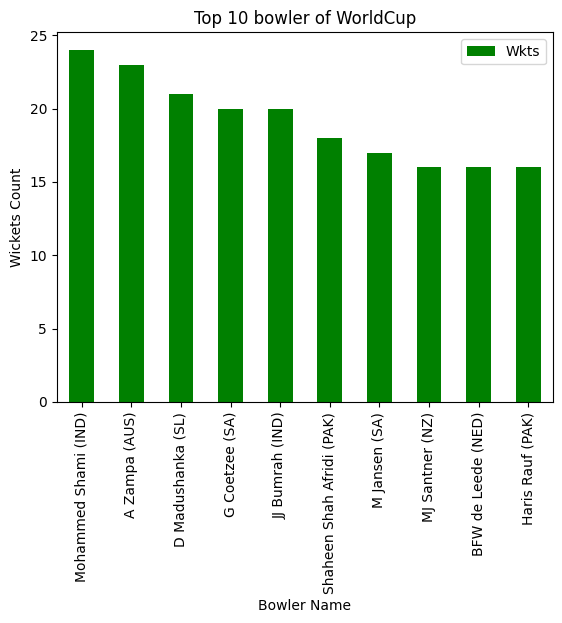

In [25]:
plt.figure(figsize=(10,8))
bowl.plot(kind='bar',x='Player',y='Wkts',color='green')
plt.title('Top 10 bowler of WorldCup')
plt.xlabel('Bowler Name')
plt.ylabel('Wickets Count')
plt.show()

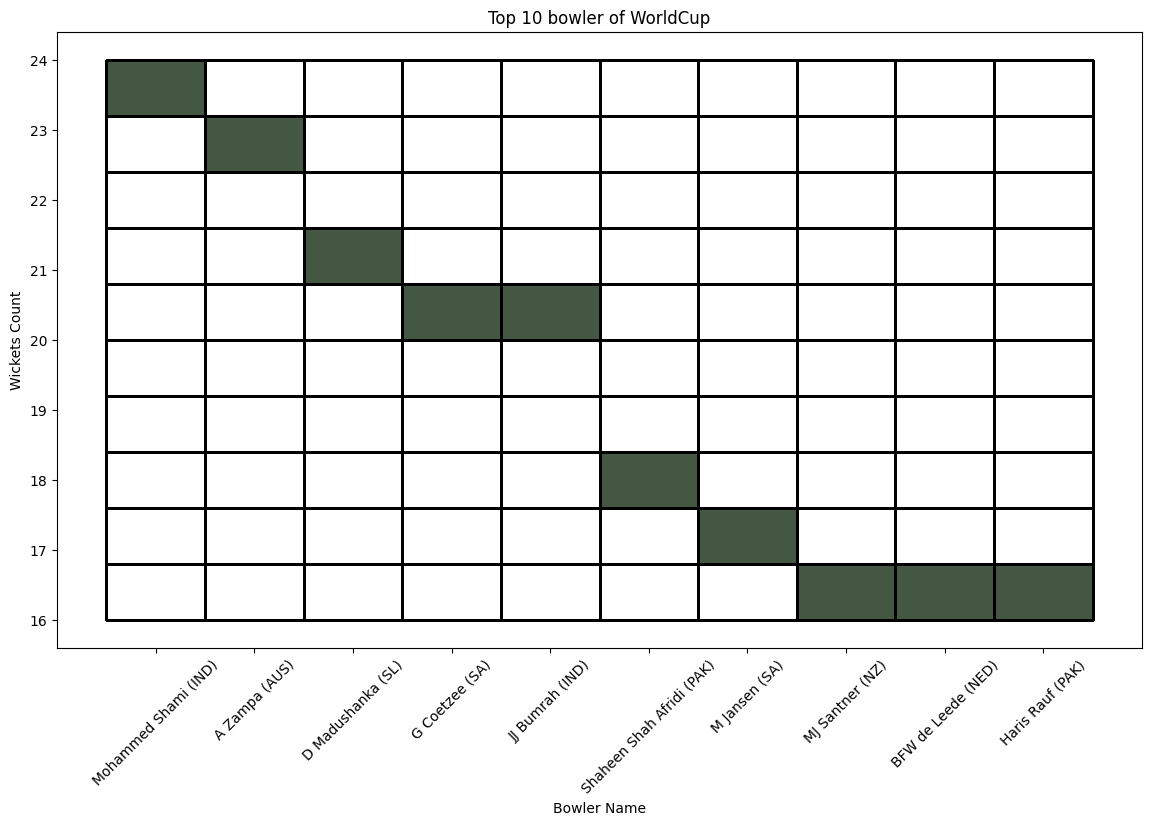

In [26]:
plt.figure(figsize=(14, 8))
sns.histplot(x='Player', bins=10, y='Wkts', data=bowl, color='lightgreen', edgecolor='black')
plt.title('Top 10 bowler of WorldCup')
plt.xlabel('Bowler Name')
plt.ylabel('Wickets Count')
plt.xticks(rotation=45)
plt.show()

**Top 5 Highest Catches caught by the player and team**

In [27]:
catch = df_catches.sort_values('Ct',ascending=False).head(5)
catch

,Player,Span,Mat,Inns,Ct,Max,Ct/Inn
0,DJ Mitchell (NZ),2023-2023,10,10,11,3,1.100
2,DA Warner (AUS),2023-2023,11,11,8,2,0.727
1,M Labuschagne (AUS),2023-2023,11,11,8,2,0.727
3,DA Miller (SA),2023-2023,10,10,7,2,0.700
4,RA Jadeja (IND),2023-2023,11,11,7,3,0.636


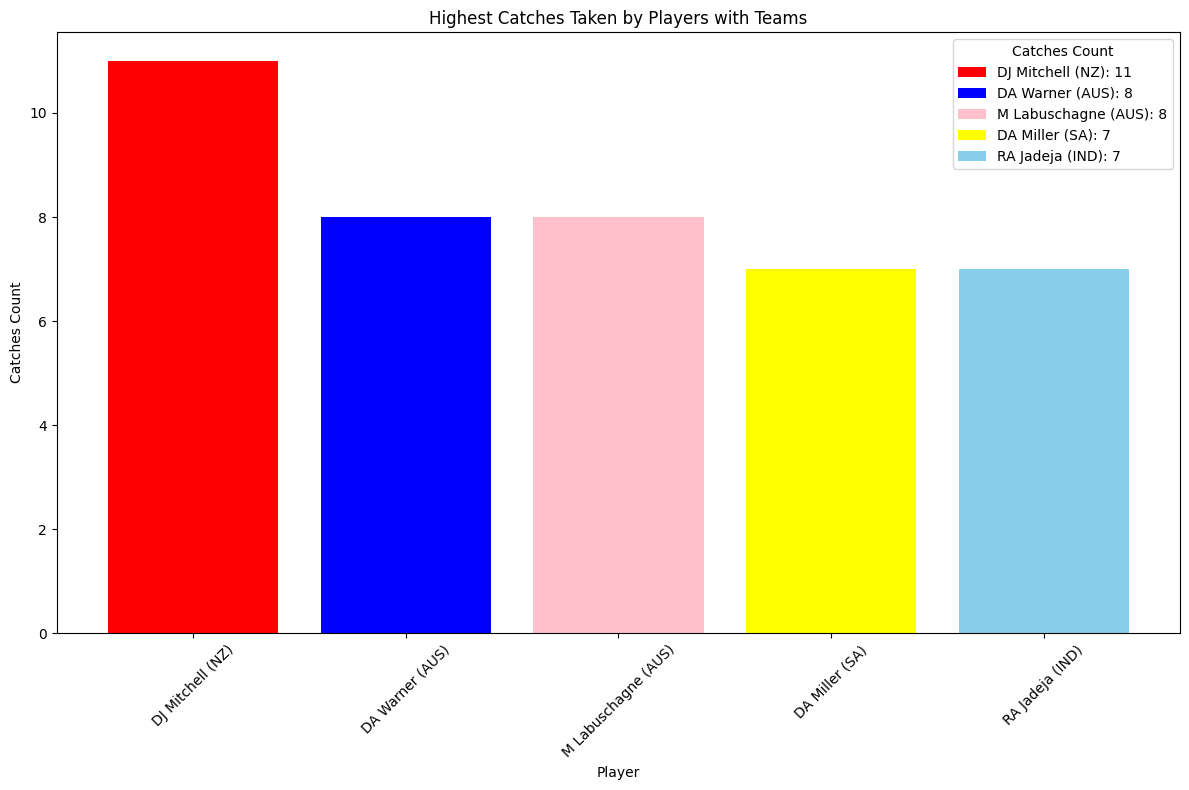

In [28]:
plt.figure(figsize=(12, 8))
players = catch['Player']
catch_counts = catch['Ct']
bars = plt.bar(players, catch_counts, color=('red', 'blue', 'pink', 'yellow', 'skyblue'))
legend_labels = [f'{player}: {count}' for player, count in zip(players, catch_counts)]
plt.legend(bars, legend_labels, title='Catches Count')
plt.title('Highest Catches Taken by Players with Teams')
plt.xlabel('Player')
plt.ylabel('Catches Count')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()


In [29]:
matches_data = df_matchresult.sort_values('Scorecard')
matches_data

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard
47,England,New Zealand,New Zealand,9 wickets,Ahmedabad,"Oct 5, 2023",ODI # 4658
46,Netherlands,Pakistan,Pakistan,81 runs,Hyderabad,"Oct 6, 2023",ODI # 4659
45,Afghanistan,Bangladesh,Bangladesh,6 wickets,Dharamsala,"Oct 7, 2023",ODI # 4660
44,South Africa,Sri Lanka,South Africa,102 runs,Delhi,"Oct 7, 2023",ODI # 4661
43,India,Australia,India,6 wickets,Chennai,"Oct 8, 2023",ODI # 4662
42,Netherlands,New Zealand,New Zealand,99 runs,Hyderabad,"Oct 9, 2023",ODI # 4663
41,Bangladesh,England,England,137 runs,Dharamsala,"Oct 10, 2023",ODI # 4664
40,Pakistan,Sri Lanka,Pakistan,6 wickets,Hyderabad,"Oct 10, 2023",ODI # 4665
39,India,Afghanistan,India,8 wickets,Delhi,"Oct 11, 2023",ODI # 4666
38,Australia,South Africa,South Africa,134 runs,Lucknow,"Oct 12, 2023",ODI # 4667


**Highest Run scored by player and team**

In [30]:
scorer = df_highestscore.head(10)
scorer

,Player,Runs,Mins,Balls,4s,6s,SR,Team,Opposition,Ground,Match Date,Scorecard
0,GJ Maxwell,201*,181,128,21,10,157.03,Australia,v Afghanistan,Wankhede,07 Nov 2023,ODI # 4696
1,MR Marsh,177*,177,132,17,9,134.09,Australia,v Bangladesh,Pune,11 Nov 2023,ODI # 4700
2,Q de Kock,174,192,140,15,7,124.28,South Africa,v Bangladesh,Wankhede,24 Oct 2023,ODI # 4680
3,DA Warner,163,180,124,14,9,131.45,Australia,v Pakistan,Bengaluru,20 Oct 2023,ODI # 4675
4,DP Conway,152*,147,121,19,3,125.61,New Zealand,v England,Ahmedabad,05 Oct 2023,ODI # 4658
5,DJ Malan,140,106,107,16,5,130.84,England,v Bangladesh,Dharamsala,10 Oct 2023,ODI # 4664
6,TM Head,137,166,120,15,4,114.16,Australia,v India,Ahmedabad,19 Nov 2023,ODI # 4705
7,DJ Mitchell,134,180,119,9,7,112.60,New Zealand,v India,Wankhede,15 Nov 2023,ODI # 4703
8,HE van der Dussen,133,172,118,9,5,112.71,South Africa,v New Zealand,Pune,01 Nov 2023,ODI # 4689
9,Mohammad Rizwan,131*,193,121,8,3,108.26,Pakistan,v Sri Lanka,Hyderabad,10 Oct 2023,ODI # 4665


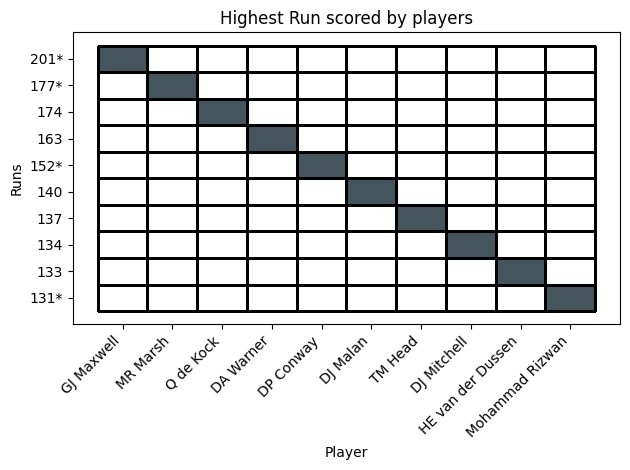

In [31]:
sns.histplot(x='Player',y='Runs', bins=20, kde=True, data=scorer, color='skyblue', edgecolor='black')
plt.title('Highest Run scored by players')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

**Team that win most matches in sort**

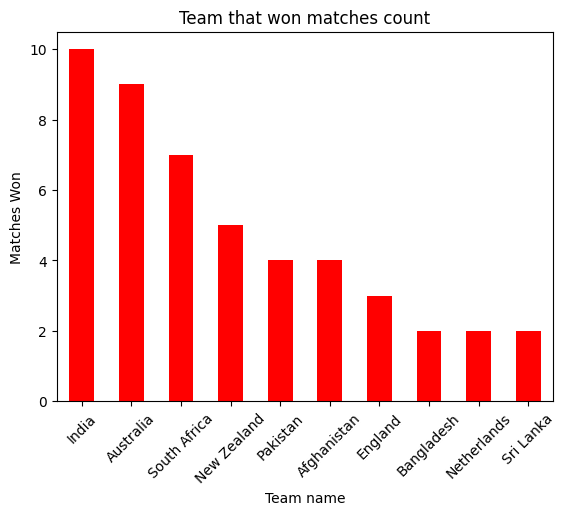

In [32]:
match = matches_data['Winner'].value_counts()
match.plot(kind='bar',color='red')
plt.title('Team that won matches count')
plt.xlabel('Team name')
plt.ylabel('Matches Won')
plt.xticks(rotation=45)
plt.show()

**Matches according to the Stadium And the winner**

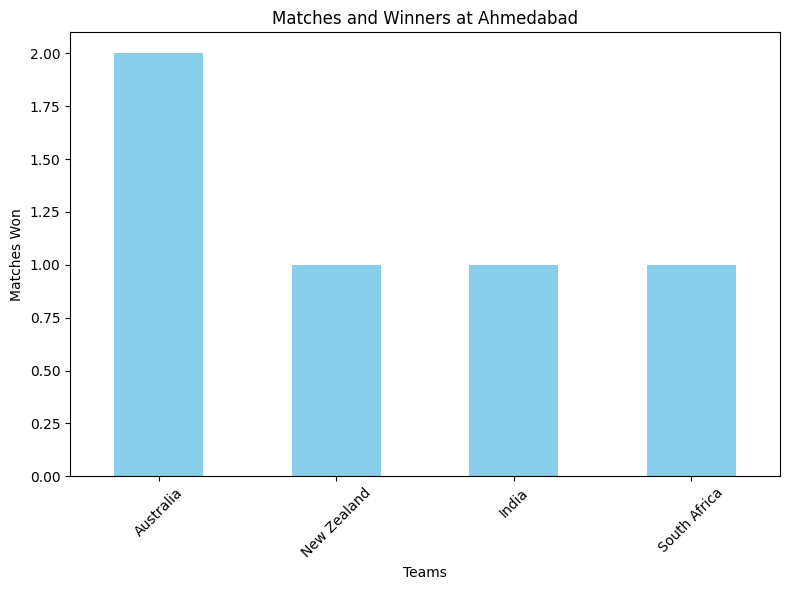

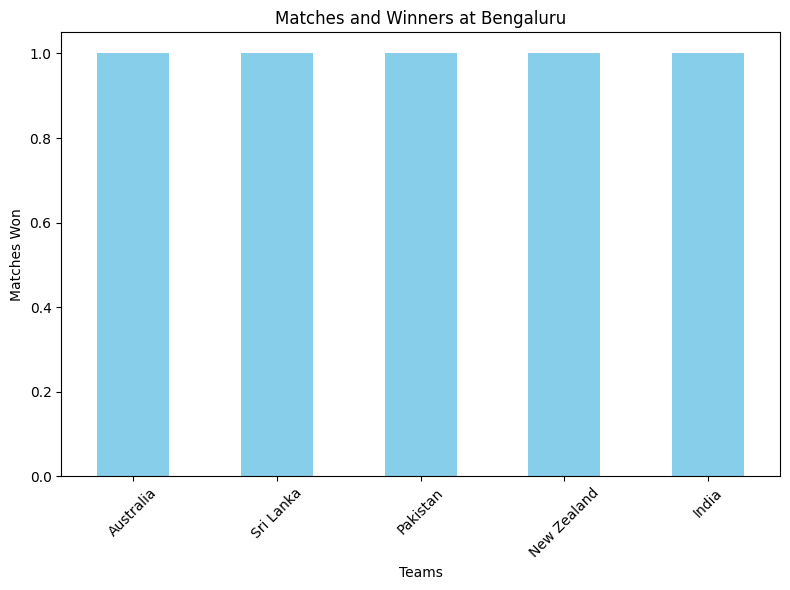

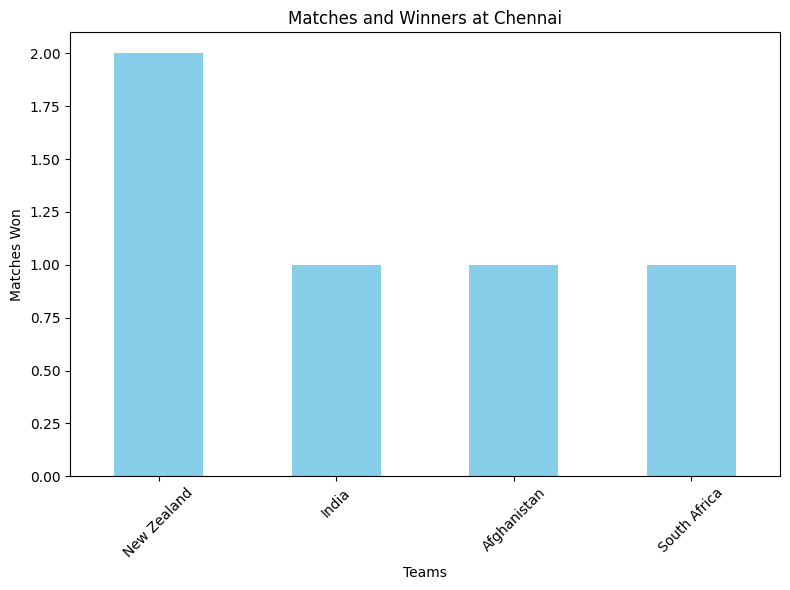

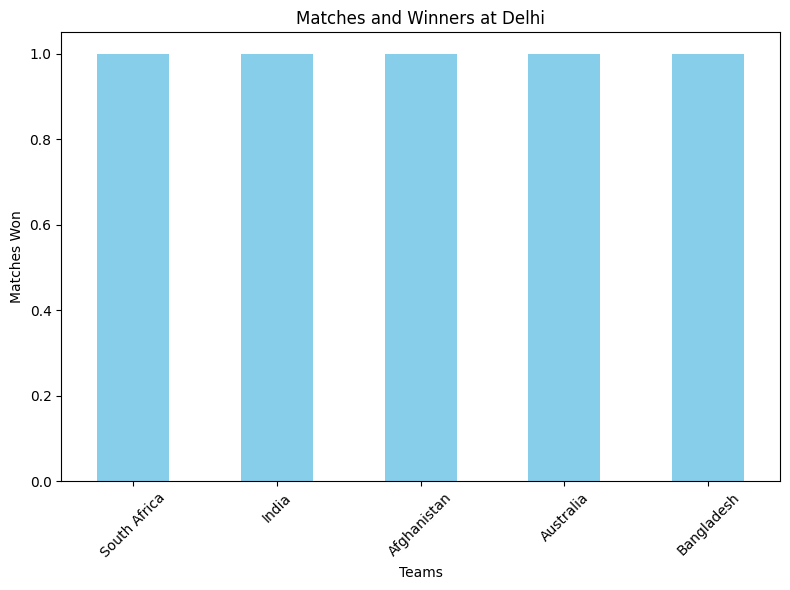

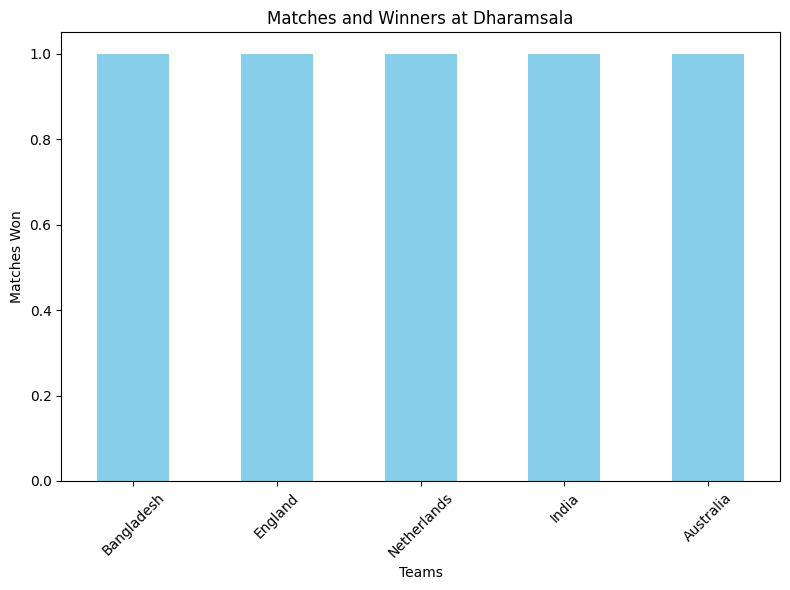

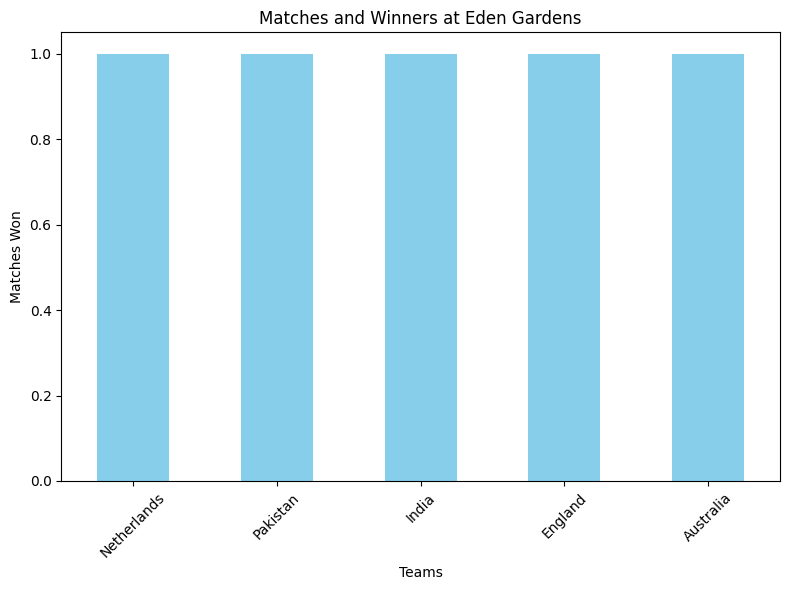

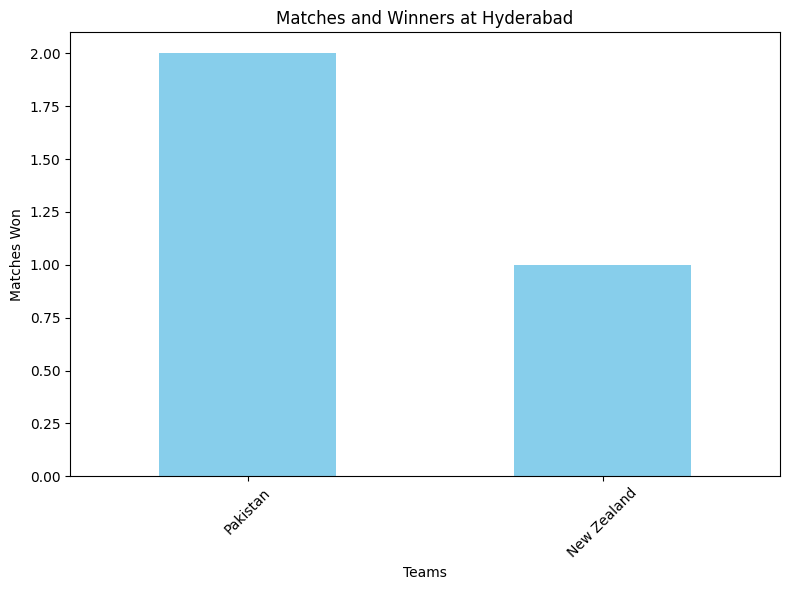

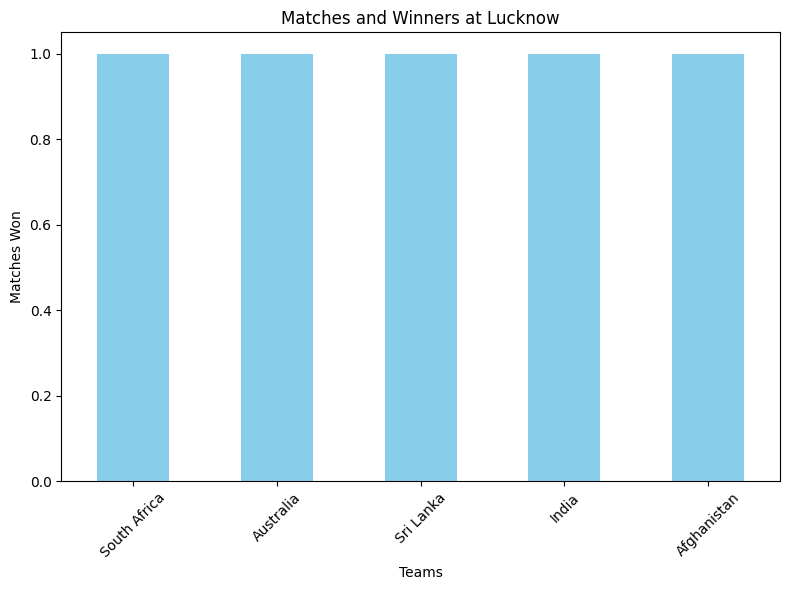

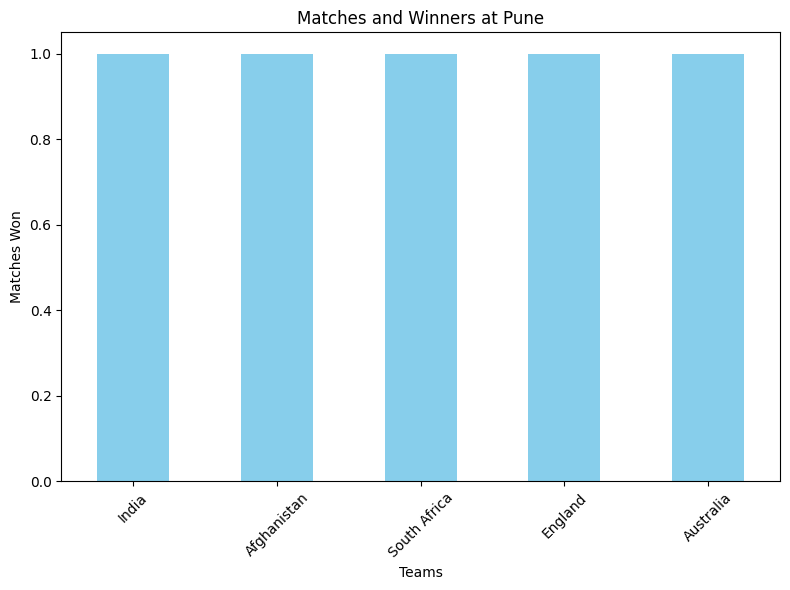

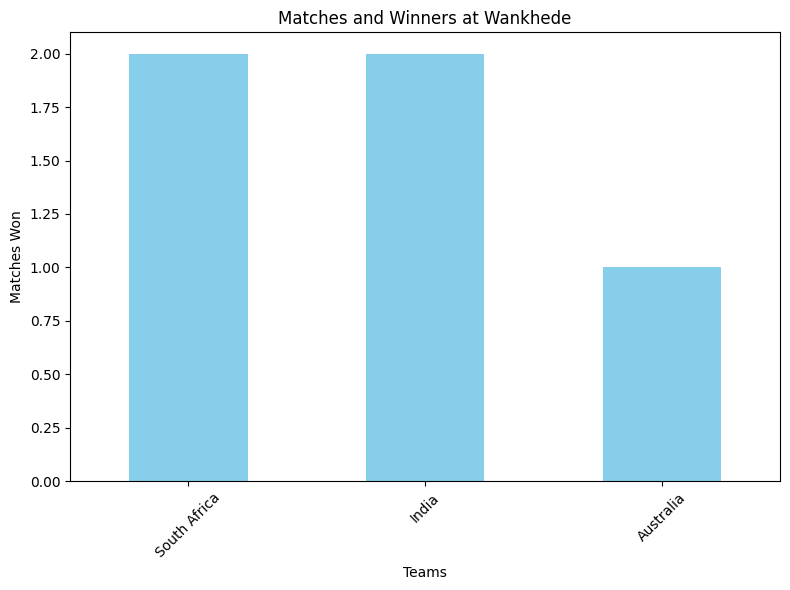

In [33]:
grouped_by_stadium = matches_data.groupby('Ground')
for stadium, matches in grouped_by_stadium:
    plt.figure(figsize=(8, 6))
    winners = matches['Winner'].value_counts()
    winners.plot(kind='bar', color='skyblue')
    plt.title(f"Matches and Winners at {stadium}")
    plt.xlabel('Teams')
    plt.ylabel('Matches Won')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# **Team to won Worldcup**

In [34]:
Champions = df_matchresult.sort_values('Scorecard',ascending=False).head(1)
Champions

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard
0,India,Australia,Australia,6 wickets,Ahmedabad,"Nov 19, 2023",ODI # 4705


# Australia beats India by 6 Wickets and Won the WorldCup 2023